# This notebook documents and contains the code for analyzing and extracting the dataset to save it in a suitable way

In [1]:
!pip install pandas 
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
# First, we load the data
heart_df = pd.read_csv('data/heart.csv')



In [3]:
print(heart_df.head())
print('dataset length:', len(heart_df))
print('amount of columns:', len(heart_df.columns))
print('NaNs:', np.any(pd.isna(heart_df)))
print('Nulls:', np.any(pd.isnull(heart_df)))

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
dataset length: 303
amount of columns: 14
NaNs: False
Nulls: False


We conclude that the data is clean! At least in the sense that there are no missing values

The data contains a set of features (measurements for persons) as well as a label called 'output'. The label indicates whether or not a person has a higher likelihood of having a heart attack or not. The complete list of columns and what they represent are below:

* age: the subject's age
* sex: gender
* cp: chest pain type:
    - 1: Typical angina
    - 2: Atypical angina
    - 3: Non-angical pain
    - 4: asymptomatic
* trtbps: Resting blood pressure (in mm Hg)
* chol: cholesterol in mg/dl (via BMI sensor)
* fbs: fasting blood sugar > 120mg/dl (1=true, 0=false)
* rest_ecg : resting electrocardiographic results
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalachh : maximum heart rate achieved
* exng: exercise induced angina (1=true, 0=false)
* oldpeak: previous peak blood pressure
* slp: slope
* caa: number of major vessels (0-3)
* thall: Thal rate
* output: High/Low likelihood of heart attack (0: Low, 1: High)

a link to the dataset can be found at https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

We note that cp and rest_ecg are categorical values, so we encode those into separate, binary variables instead

In [4]:
heart_df[['cp']] = heart_df[['cp']].astype('category')
cp = heart_df[['cp']]
heart_df.drop('cp', axis='columns', inplace=True)
cp = pd.get_dummies(cp)



heart_df[['restecg']] = heart_df[['restecg']].astype('category')
restecg = heart_df[['restecg']]
heart_df.drop('restecg', axis='columns', inplace=True)
restecg = pd.get_dummies(restecg)

heart_df = pd.concat([restecg, cp, heart_df], axis=1)
heart_df.head()

,restecg_0,restecg_1,restecg_2,cp_0,cp_1,cp_2,cp_3,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output
0,1,0,0,0,0,0,1,63,1,145,233,1,150,0,2.3,0,0,1,1
1,0,1,0,0,0,1,0,37,1,130,250,0,187,0,3.5,0,0,2,1
2,1,0,0,0,1,0,0,41,0,130,204,0,172,0,1.4,2,0,2,1
3,0,1,0,0,1,0,0,56,1,120,236,0,178,0,0.8,2,0,2,1
4,0,1,0,1,0,0,0,57,0,120,354,0,163,1,0.6,2,0,2,1


Now, lets plot the correlation

[Text(0.5, 0, 'restecg_0'),
 Text(1.5, 0, 'restecg_1'),
 Text(2.5, 0, 'restecg_2'),
 Text(3.5, 0, 'cp_0'),
 Text(4.5, 0, 'cp_1'),
 Text(5.5, 0, 'cp_2'),
 Text(6.5, 0, 'cp_3'),
 Text(7.5, 0, 'age'),
 Text(8.5, 0, 'sex'),
 Text(9.5, 0, 'trtbps'),
 Text(10.5, 0, 'chol'),
 Text(11.5, 0, 'fbs'),
 Text(12.5, 0, 'thalachh'),
 Text(13.5, 0, 'exng'),
 Text(14.5, 0, 'oldpeak'),
 Text(15.5, 0, 'slp'),
 Text(16.5, 0, 'caa'),
 Text(17.5, 0, 'thall'),
 Text(18.5, 0, 'output')]

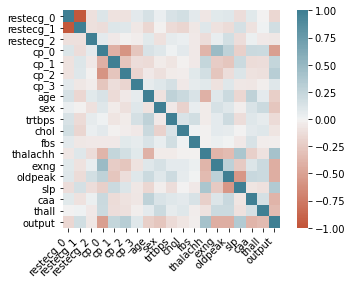

In [5]:

import numpy as np
import seaborn

# plot correlation
corr = heart_df.corr()
ax = seaborn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=seaborn.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

We can see that some columns have a rather weak correlation with the label(the last column in the dataset), especially fbs (fasting blood sugar) at close to 0. Since it is so low, it will likely just introduce noise, so lets exclude it from our dataset

In [6]:
heart_df.drop('fbs', axis='columns', inplace=True)

As a final exploration, lets do pca to have a way to visualize the data. First of all, it's a good idea to standardize the dataset

In [7]:
from sklearn import preprocessing

data = heart_df.values
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(data)
data_scaled = std_scaler.transform(data)
std_df = pd.DataFrame(data_scaled)
std_df.columns = heart_df.columns
std_df.head()

,restecg_0,restecg_1,restecg_2,cp_0,cp_1,cp_2,cp_3,age,sex,trtbps,chol,thalachh,exng,oldpeak,slp,caa,thall,output
0,1.030158,-1.003306,-0.115663,-0.945384,-0.444554,-0.634648,3.489114,0.952197,0.681005,0.763956,-0.256334,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529
1,-0.970725,0.996705,-0.115663,-0.945384,-0.444554,1.575677,-0.286606,-1.915313,0.681005,-0.092738,0.072199,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529
2,1.030158,-1.003306,-0.115663,-0.945384,2.249444,-0.634648,-0.286606,-1.474158,-1.468418,-0.092738,-0.816773,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529
3,-0.970725,0.996705,-0.115663,-0.945384,2.249444,-0.634648,-0.286606,0.180175,0.681005,-0.663867,-0.198357,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529
4,-0.970725,0.996705,-0.115663,1.057772,-0.444554,-0.634648,-0.286606,0.290464,-1.468418,-0.663867,2.082050,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529


Now that the data is standardized we can do the PCA using numpy

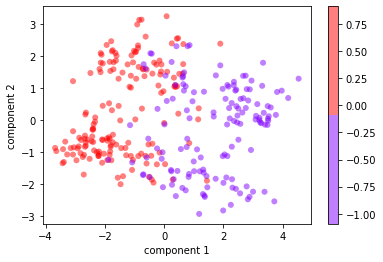

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(2)
projected = pca.fit_transform(std_df.values)
plt.scatter(projected[:, 0], projected[:, 1],
            c=std_df.values[:,-1], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

This scatterplot shows the data projected onto the first two principal components, and the labels for each observation. We can see that thanks to the pca, the data seems to relatively linearly separable. Lets try to repeat above but with 3 principal components!

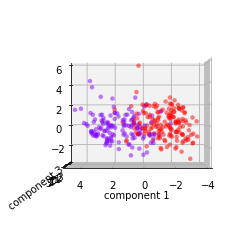

In [9]:
pca = PCA(3)
projected = pca.fit_transform(std_df.values)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2],
            c=std_df.values[:,-1], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 2))
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_ylabel('component 3')
ax.view_init(azim=90, elev=0)

Adding one principal component doesnt seem to make the data more separable. Now that we have vizualized the data lets save it for the next step, feature engineering

In [10]:
heart_df = heart_df.sample(frac=1) # data is ordered by label so we should shuffle it


heart_df.to_csv('data/post_ETL.csv', index=False)
heart_df.head()